In [110]:
# Jio fibre wants to implement AI/ML in their systems. The activity task is to build a
# network intrusion detector, a predictive model capable of distinguishing between
# ``bad'' connections, called intrusions or attacks, and ``good'' normal connections.
# This database contains a standard set of data to be audited, which includes a wide
# variety of intrusions in network environment.
# Your target is building a machine efficient learning model using different models,
# probabilities of bad or good connections using tree-based model. This is a multiclass classification. 
# Fine tune the model and make a model which have at least 97
# percent accuracy. “intrusion” is the target variable

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
df=pd.read_csv("tcp-connection.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [113]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [114]:
## no null value detetected

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [116]:
df['protocol_type'].value_counts()

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: protocol_type, dtype: int64

In [117]:
df['service'].value_counts()

b'ecr_i'      281400
b'private'    110893
b'http'        64293
b'smtp'         9723
b'other'        7237
               ...  
b'X11'            11
b'tim_i'           7
b'red_i'           1
b'tftp_u'          1
b'pm_dump'         1
Name: service, Length: 66, dtype: int64

In [118]:
df['service'].nunique()

66

In [119]:
df['flag'].value_counts()

b'SF'        378440
b'S0'         87007
b'REJ'        26875
b'RSTR'         903
b'RSTO'         579
b'SH'           107
b'S1'            57
b'S2'            24
b'RSTOS0'        11
b'S3'            10
b'OTH'            8
Name: flag, dtype: int64

In [120]:
(df['intrusion'].value_counts(normalize=True))*100

b'smurf.'              56.837665
b'neptune.'            21.699685
b'normal.'             19.691066
b'back.'                0.445932
b'satan.'               0.321646
b'ipsweep.'             0.252418
b'portsweep.'           0.210517
b'warezclient.'         0.206469
b'teardrop.'            0.198170
b'pod.'                 0.053439
b'nmap.'                0.046759
b'guess_passwd.'        0.010728
b'buffer_overflow.'     0.006073
b'land.'                0.004251
b'warezmaster.'         0.004048
b'imap.'                0.002429
b'rootkit.'             0.002024
b'loadmodule.'          0.001822
b'ftp_write.'           0.001619
b'multihop.'            0.001417
b'phf.'                 0.000810
b'perl.'                0.000607
b'spy.'                 0.000405
Name: intrusion, dtype: float64

In [121]:
## one-hot encoding for protocole type,service and flag
## label encoding for intrusion

In [122]:
df['land'].describe()

count    494021.000000
mean          0.000045
std           0.006673
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: land, dtype: float64

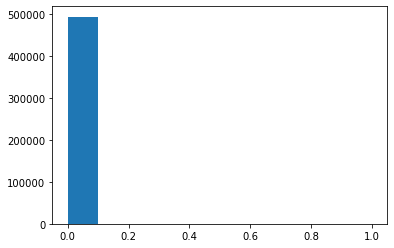

In [123]:
plt.hist(df['land'])
plt.show()

In [124]:
df[df['land']>.5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
37226,0,b'tcp',b'finger',b'S0',0,0,1,0,0,0,...,4,1.00,0.00,1.00,1.00,1.00,0.75,0.00,0.0,b'land.'
40580,0,b'tcp',b'finger',b'S0',0,0,1,0,0,0,...,6,1.00,0.00,1.00,0.50,1.00,0.17,0.00,0.0,b'land.'
43001,0,b'tcp',b'finger',b'S0',0,0,1,0,0,0,...,6,1.00,0.00,1.00,1.00,1.00,0.83,0.00,0.0,b'land.'
65581,0,b'tcp',b'finger',b'S0',0,0,1,0,0,0,...,6,1.00,0.00,1.00,0.33,1.00,0.17,0.00,0.0,b'land.'
111903,0,b'tcp',b'finger',b'S0',0,0,1,0,0,0,...,1,0.07,0.20,0.07,0.00,0.07,1.00,0.07,0.0,b'land.'
151338,0,b'tcp',b'finger',b'S0',0,0,1,0,0,0,...,11,1.00,0.00,1.00,0.27,1.00,0.09,0.00,0.0,b'normal.'
170651,0,b'tcp',b'finger',b'S0',0,0,1,0,0,0,...,6,1.00,0.00,1.00,0.33,1.00,0.17,0.00,0.0,b'land.'
195116,0,b'tcp',b'finger',b'S0',0,0,1,0,0,0,...,3,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.0,b'land.'
238401,0,b'tcp',b'finger',b'S0',0,0,1,0,0,0,...,2,0.12,0.19,0.12,0.00,0.12,1.00,0.06,0.0,b'land.'
239877,0,b'tcp',b'finger',b'S0',0,0,1,0,0,0,...,1,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.0,b'land.'


In [125]:
df['land'].value_counts(normalize=True)

0    0.999955
1    0.000045
Name: land, dtype: float64

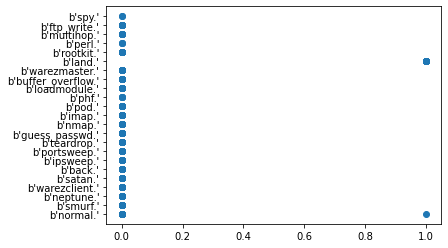

In [126]:
plt.scatter(df['land'],df['intrusion'])
plt.show()

In [127]:
df['wrong_fragment'].value_counts(normalize=True)

0    0.997494
3    0.001963
1    0.000542
Name: wrong_fragment, dtype: float64

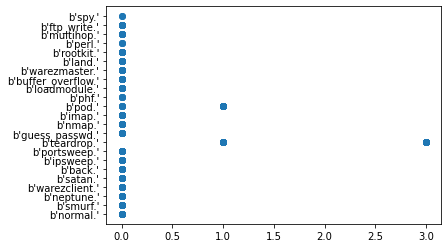

In [128]:
plt.scatter(df['wrong_fragment'],df['intrusion'])
plt.show()

In [129]:
df['urgent'].value_counts(normalize=True)

0    0.999992
1    0.000004
2    0.000002
3    0.000002
Name: urgent, dtype: float64

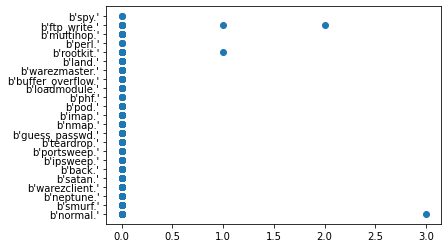

In [130]:
plt.scatter(df['urgent'],df['intrusion'])
plt.show()

In [131]:
df['hot'].value_counts(normalize=True)*100

0     99.353874
2      0.443706
28     0.055463
1      0.051820
4      0.022671
6      0.021052
5      0.010323
3      0.007692
14     0.007490
22     0.005668
30     0.005668
19     0.004656
18     0.002631
24     0.002631
20     0.002024
7      0.001012
12     0.000405
17     0.000405
10     0.000202
9      0.000202
15     0.000202
16     0.000202
Name: hot, dtype: float64

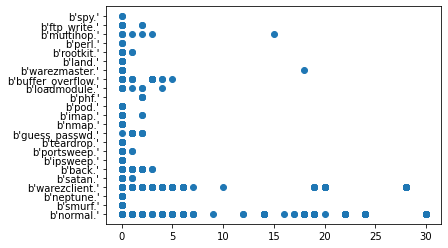

In [132]:
plt.scatter(df['hot'],df['intrusion'])
plt.show()

In [133]:
df['num_failed_logins'].value_counts(normalize=True)

0    0.999872
1    0.000115
2    0.000006
3    0.000002
4    0.000002
5    0.000002
Name: num_failed_logins, dtype: float64

In [134]:
df['logged_in'].value_counts(normalize=True)*100

0    85.175327
1    14.824673
Name: logged_in, dtype: float64

In [135]:
df['num_compromised'].value_counts(normalize=True)*100

0      99.549817
1       0.435407
2       0.004858
4       0.003239
3       0.002227
6       0.000607
5       0.000405
7       0.000405
21      0.000202
238     0.000202
884     0.000202
102     0.000202
38      0.000202
281     0.000202
22      0.000202
13      0.000202
275     0.000202
18      0.000202
16      0.000202
12      0.000202
11      0.000202
9       0.000202
767     0.000202
Name: num_compromised, dtype: float64

In [136]:
df['root_shell'].value_counts(normalize=True)*100

0    99.988867
1     0.011133
Name: root_shell, dtype: float64

In [137]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

In [139]:
#label encoding intrusion
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()


In [141]:
df['intrusion']=label_encoder.fit_transform(df['intrusion'])

In [138]:
d

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [147]:
#one hot encoding protocol,service and flag
df=pd.get_dummies(df,columns=['protocol_type','service','flag'])
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_b'REJ',flag_b'RSTO',flag_b'RSTOS0',flag_b'RSTR',flag_b'S0',flag_b'S1',flag_b'S2',flag_b'S3',flag_b'SF',flag_b'SH'
0,0,44,134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1489,385,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Columns: 119 entries, duration to flag_b'SH'
dtypes: float64(15), int32(1), int64(23), uint8(80)
memory usage: 182.8 MB


In [149]:
num_cols=['land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login']
## num_cols should dropped

In [150]:
x=df.drop(columns=['land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login','intrusion'])
y=df['intrusion']

In [166]:
x.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count',
       'serror_rate', 'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate',
       ...
       'flag_b'REJ'', 'flag_b'RSTO'', 'flag_b'RSTOS0'', 'flag_b'RSTR'',
       'flag_b'S0'', 'flag_b'S1'', 'flag_b'S2'', 'flag_b'S3'', 'flag_b'SF'',
       'flag_b'SH''],
      dtype='object', length=102)

In [169]:
y.head(10)

0    11
1    11
2    18
3    18
4     9
5    18
6    18
7    18
8    18
9    18
Name: intrusion, dtype: int32

In [197]:

x=x.drop(columns=['serror_rate','srv_serrer_rate','rerror_rate','srv_rerror_rate'])
x

KeyError: "['serror_rate' 'srv_serrer_rate' 'rerror_rate' 'srv_rerror_rate'] not found in axis"

In [199]:
from sklearn.model_selection import train_test_split


In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

,duration,src_bytes,dst_bytes,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,...,flag_b'REJ',flag_b'RSTO',flag_b'RSTOS0',flag_b'RSTR',flag_b'S0',flag_b'S1',flag_b'S2',flag_b'S3',flag_b'SF',flag_b'SH'
317921,0,0,0,121,3,0.02,0.06,0.0,255,3,...,0,0,0,0,1,0,0,0,0,0
171422,0,0,0,114,6,0.05,0.07,0.0,255,6,...,1,0,0,0,0,0,0,0,0,0
312181,0,0,0,149,2,0.01,0.06,0.0,255,2,...,0,0,0,0,1,0,0,0,0,0
87346,2131,147,105,1,1,1.00,0.00,0.0,255,3,...,0,0,0,0,0,0,0,0,1,0
57449,0,1032,0,511,511,1.00,0.00,0.0,255,255,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367818,0,1032,0,511,511,1.00,0.00,0.0,255,255,...,0,0,0,0,0,0,0,0,1,0
82157,0,520,0,511,511,1.00,0.00,0.0,255,255,...,0,0,0,0,0,0,0,0,1,0
26246,0,1032,0,511,511,1.00,0.00,0.0,255,255,...,0,0,0,0,0,0,0,0,1,0
303821,0,0,0,286,14,0.05,0.06,0.0,255,14,...,0,0,0,0,1,0,0,0,0,0


In [204]:
from sklearn.metrics import accuracy_score

In [207]:
#### decision trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)*100

99.9514194625778

In [208]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier()
rt.fit(x_train, y_train)
y_pred = rt.predict(x_test)
accuracy_score(y_test, y_pred)*100

99.96862506958149

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)*100